# Exploration of SANDAG Data

### setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.cm

In [2]:
df_age = pd.read_excel("sandag.xlsx", sheetname="Age")
df_eth = pd.read_excel("sandag.xlsx", sheetname="Ethnicity")
df_house = pd.read_excel("sandag.xlsx", sheetname="Housing")
df_pop = pd.read_excel("sandag.xlsx", sheetname="Population")
df_income = pd.read_excel("sandag.xlsx", sheetname="Income")

In [3]:
df_income

,CPA,YEAR,ORDINAL,INCOME GROUP,HOUSEHOLDS
0,32nd Street Naval Station,2010,1,"Less than $15,000",0
1,32nd Street Naval Station,2010,2,"$15,000 to $29,999",0
2,32nd Street Naval Station,2010,3,"$30,000 to $44,999",0
3,32nd Street Naval Station,2010,4,"$45,000 to $59,999",0
4,32nd Street Naval Station,2010,5,"$60,000 to $74,999",0
5,32nd Street Naval Station,2010,6,"$75,000 to $99,999",0
6,32nd Street Naval Station,2010,7,"$100,000 to $124,999",0
7,32nd Street Naval Station,2010,8,"$125,000 to $149,999",0
8,32nd Street Naval Station,2010,9,"$150,000 to $199,999",0
9,32nd Street Naval Station,2010,10,"$200,000 or more",0


In [ ]:
#df_income.plot(x="INCOME GROUP", y= "HOUSEHOLDS",  kind="bar", figsize=(50,50))

In [4]:
nbrhoods = set(df_income["CPA"])
num_hoods = len(nbrhoods)
print ("Number of neighborhoods is ", num_hoods)
nbrhoods

('Number of neighborhoods is ', 86)


{u'32nd Street Naval Station',
 u'Alpine',
 u'Balboa Park',
 u'Barona',
 u'Barrio Logan',
 u'Black Mountain Ranch',
 u'Bonsall',
 u'Carmel Mountain Ranch',
 u'Carmel Valley',
 u'Central Mountain',
 u'City Heights',
 u'Clairemont Mesa',
 u'College Area',
 u'County Islands',
 u'Crest-Dehesa',
 u'Del Mar Mesa',
 u'Desert',
 u'Downtown',
 u'East Elliott',
 u'Eastern Area',
 u'Encanto',
 u'Fairbanks Country Club',
 u'Fallbrook',
 u'Flower Hill',
 u'Greater Golden Hill',
 u'Greater North Park',
 u'Harbor',
 u'Jamul-Dulzura',
 u'Julian',
 u'Kearny Mesa',
 u'Kensington-Talmadge',
 u'La Jolla',
 u'Lakeside',
 u'Linda Vista',
 u'Lindbergh Field',
 u'Los Penasquitos Canyon Preserve',
 u'Midway-Pacific Highway',
 u'Mira Mesa',
 u'Miramar Air Station',
 u'Miramar Ranch North',
 u'Mission Bay Park',
 u'Mission Beach',
 u'Mission Valley',
 u'Mountain Empire',
 u'Navajo',
 u'Ncfua Reserve',
 u'Ncfua Subarea 2',
 u'Nestor',
 u'Normal Heights',
 u'North County Metro',
 u'North Mountain',
 u'Ocean Beach'

In [5]:
df_small = df_income.loc[(df_income['CPA'] == "La Jolla") | (df_income['CPA'] == "La Jolla") | (df_income['CPA'] == "Downtown") | (df_income['CPA'] == "Kearny Mesa") ]
df_laj16 = df_small.loc[(df_income['CPA'] == "La Jolla") & (df_income['YEAR'] == 2016)]
df_dwtn16 = df_small.loc[(df_income['CPA'] == "Downtown") & (df_income['YEAR'] == 2016)]
df_krny16 = df_small.loc[(df_income['CPA'] == "Kearny Mesa") & (df_income['YEAR'] == 2016)]
df16 = df_small.loc[ (df_income['YEAR'] == 2016) ]
df_laj =  df_income.loc[(df_income['CPA'] == "La Jolla")]

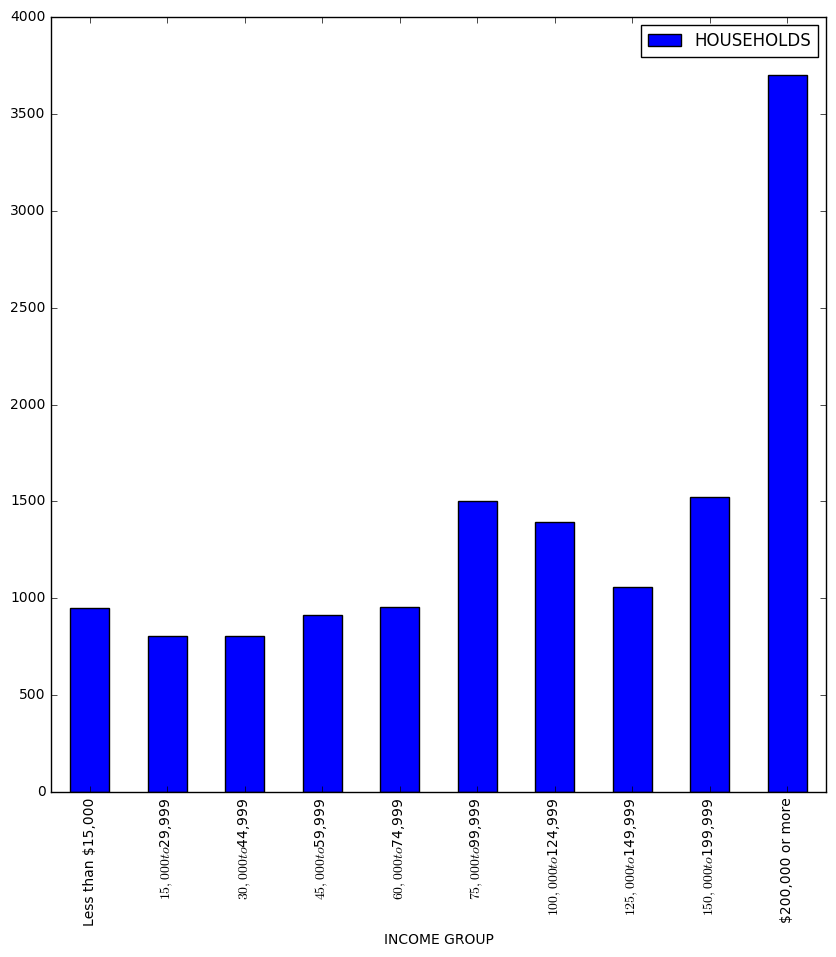

In [6]:
df_laj16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

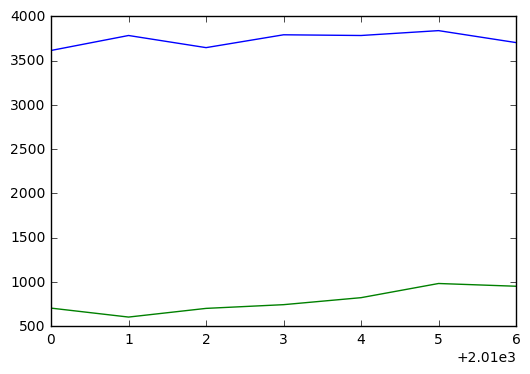

In [7]:
df_laj_poor = df_laj.loc[df_laj['INCOME GROUP'] == "Less than $15,000"]
df_laj_rich = df_laj.loc[df_laj['INCOME GROUP'] == "$200,000 or more"]

plt.plot(df_laj_rich['YEAR'],df_laj_rich['HOUSEHOLDS'] )
plt.hold
plt.plot(df_laj_poor['YEAR'],df_laj_poor['HOUSEHOLDS'] )

## Trying different plot configurations

In [8]:
df = df_income.pivot_table(columns = ["INCOME GROUP"])
df

INCOME GROUP,"$100,000 to $124,999","$125,000 to $149,999","$15,000 to $29,999","$150,000 to $199,999","$200,000 or more","$30,000 to $44,999","$45,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","Less than $15,000"
HOUSEHOLDS,746.363787,463.400332,926.636213,514.730897,552.89701,928.011628,870.988372,769.551495,1066.184385,756.260797
ORDINAL,7.000000,8.000000,2.000000,9.000000,10.00000,3.000000,4.000000,5.000000,6.000000,1.000000
YEAR,2013.000000,2013.000000,2013.000000,2013.000000,2013.00000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000


In [9]:
d = {}
for i in range(10):
    d[i+1] = df_income.loc[df_income['ORDINAL'] == i+1, 'HOUSEHOLDS'].sum()
    
d

{1: 455269,
 2: 557835,
 3: 558663,
 4: 524335,
 5: 463270,
 6: 641843,
 7: 449311,
 8: 278967,
 9: 309868,
 10: 332844}

### Households in each Income Bracket by year

In [10]:
ib = df_income.groupby(["ORDINAL", "YEAR"])["HOUSEHOLDS"].sum()
ib


ORDINAL  YEAR
1        2010    62128
         2011    58972
         2012    61992
         2013    66546
         2014    67693
         2015    69438
         2016    68500
2        2010    79996
         2011    74957
         2012    77570
         2013    79593
         2014    82029
         2015    82072
         2016    81618
3        2010    83624
         2011    79139
         2012    77119
         2013    78340
         2014    80241
         2015    78954
         2016    81246
4        2010    75114
         2011    74701
         2012    72855
         2013    74270
         2014    76696
         2015    74877
         2016    75822
5        2010    63444
         2011    67560
                 ...  
6        2015    90917
         2016    91345
7        2010    60901
         2011    64454
         2012    64479
         2013    64065
         2014    62693
         2015    66352
         2016    66367
8        2010    39959
         2011    41082
         2012    413

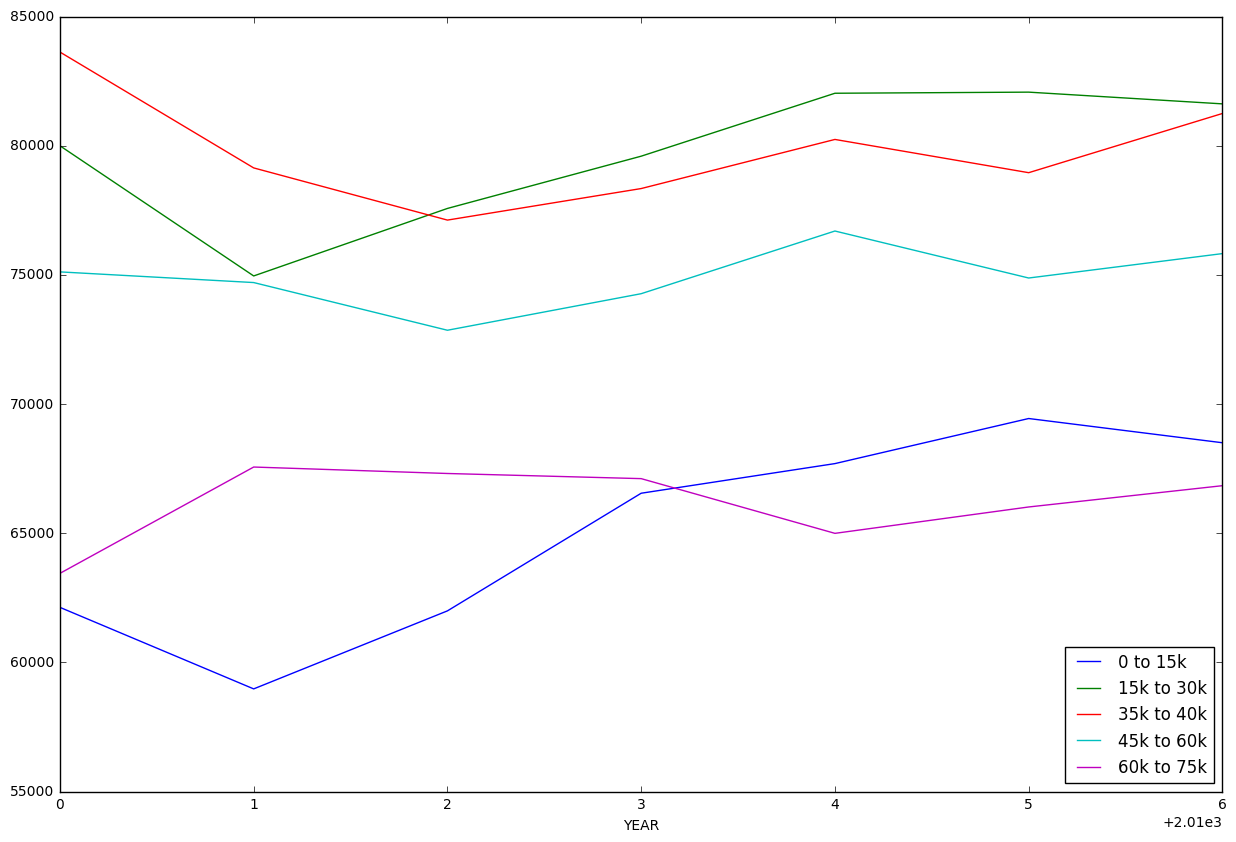

In [11]:
ib[1].plot(figsize=(15,10), label = "0 to 15k", legend="True" )
ib[2].plot(figsize=(15,10), label = "15k to 30k", legend="True")
ib[3].plot(figsize=(15,10),  label = "35k to 40k", legend="True")
ib[4].plot(figsize=(15,10), label = "45k to 60k", legend="True")
ib[5].plot(figsize=(15,10), label = "60k to 75k", legend="True" )

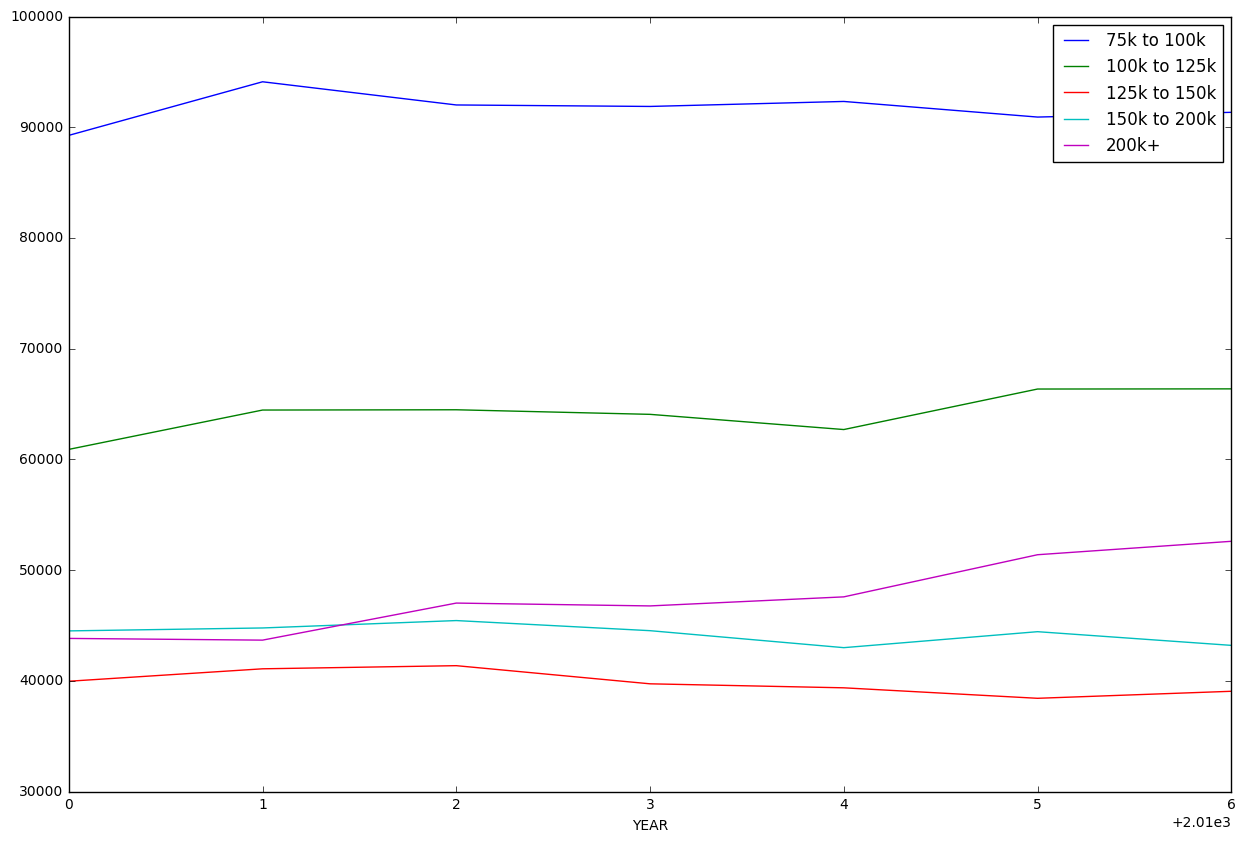

In [12]:
ib[6].plot(figsize=(15,10), label = "75k to 100k", legend="True")
ib[7].plot(figsize=(15,10),  label = "100k to 125k", legend="True")
ib[8].plot(figsize=(15,10), label = "125k to 150k", legend="True")
ib[9].plot(figsize=(15,10), label = "150k to 200k", legend="True" )
ib[10].plot(figsize=(15,10), label = "200k+", legend="True")


## Table of neighborhood vs year, plotting % of households w/ income < 30k

In [56]:
cols = ['CPA', '2016', '2015', '2014', '2013', '2012', '2011', '2010' ]
df_30k = pd.DataFrame(columns=cols)


In [57]:
hoods = df_income.CPA.unique()

# building income levels for < 30k
for h in hoods:
    df_h = df_income.loc[df_income["CPA"] == h]
    df_15k = df_h.loc[(df_h["ORDINAL"] == 1) | (df_h["ORDINAL"] == 2)]
    
    yrs=[-1]*7
    for y in range(7):
        df_y = df_h.loc[df_h["YEAR"] == (2010+y)]
        df15_y = df_15k.loc[df_15k["YEAR"] == (2010+y)]
        poor_y = df15_y["HOUSEHOLDS"].sum()
        tot_y = df_y["HOUSEHOLDS"].sum()
        if (tot_y > 0):
            yrs[y] = (float(poor_y) / tot_y) * 100
    row = [h] + yrs
    df_r = pd.DataFrame([row], columns=cols)
    df_30k = df_30k.append(df_r, ignore_index=True)

#NOTE: if the number of households in that region in that year was 0, then the percentage is displayed as -1. 
#It's probably best to just throw out these rows
    
df_30k

,CPA,2016,2015,2014,2013,2012,2011,2010
0,32nd Street Naval Station,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,Alpine,17.598606,14.711006,14.265448,16.963727,15.606037,17.302917,16.984053
2,Balboa Park,28.571429,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,Barona,16.582915,16.751269,17.412935,13.861386,15.573770,9.426230,10.245902
4,Barrio Logan,56.643357,61.628959,58.325833,61.414503,62.437811,62.242374,63.822806
5,Black Mountain Ranch,10.896226,8.526786,7.554833,7.395874,5.816067,6.377325,7.046980
6,Bonsall,17.753721,13.336948,16.401831,17.004264,18.396602,20.327350,20.606061
7,Carmel Mountain Ranch,8.581259,6.735113,7.594678,6.822811,6.800082,7.233089,6.163548
8,Carmel Valley,11.008881,10.141066,11.286191,10.917636,12.059798,12.263716,12.658131
9,Central Mountain,21.873418,18.304033,13.734568,21.781170,18.407708,14.370960,13.037037


In [59]:
df_30k= df_30k.replace("-1", np.nan)


In [60]:
df_30k = df_30k.dropna()
print(df_30k)

                        CPA       2016       2015       2014       2013  \
1                    Alpine  17.598606  14.711006  14.265448  16.963727   
3                    Barona  16.582915  16.751269  17.412935  13.861386   
4              Barrio Logan  56.643357  61.628959  58.325833  61.414503   
5      Black Mountain Ranch  10.896226   8.526786   7.554833   7.395874   
6                   Bonsall  17.753721  13.336948  16.401831  17.004264   
7     Carmel Mountain Ranch   8.581259   6.735113   7.594678   6.822811   
8             Carmel Valley  11.008881  10.141066  11.286191  10.917636   
9          Central Mountain  21.873418  18.304033  13.734568  21.781170   
10             City Heights  45.087790  46.872763  47.455895  49.887551   
11          Clairemont Mesa  21.244213  19.212403  18.919950  20.472939   
12             College Area  37.930070  38.626609  40.485021  42.380548   
13           County Islands  44.660194  45.233969  40.517241  40.410959   
14             Crest-Dehe

In [62]:
df_30k.columns = ['neighborhood', '2016', '2015', '2014', '2013', '2012', '2011', '2010']
print (df_30k)

               neighborhood       2016       2015       2014       2013  \
1                    Alpine  17.598606  14.711006  14.265448  16.963727   
3                    Barona  16.582915  16.751269  17.412935  13.861386   
4              Barrio Logan  56.643357  61.628959  58.325833  61.414503   
5      Black Mountain Ranch  10.896226   8.526786   7.554833   7.395874   
6                   Bonsall  17.753721  13.336948  16.401831  17.004264   
7     Carmel Mountain Ranch   8.581259   6.735113   7.594678   6.822811   
8             Carmel Valley  11.008881  10.141066  11.286191  10.917636   
9          Central Mountain  21.873418  18.304033  13.734568  21.781170   
10             City Heights  45.087790  46.872763  47.455895  49.887551   
11          Clairemont Mesa  21.244213  19.212403  18.919950  20.472939   
12             College Area  37.930070  38.626609  40.485021  42.380548   
13           County Islands  44.660194  45.233969  40.517241  40.410959   
14             Crest-Dehe

In [63]:
df_30k["neighborhood"]= df_30k.neighborhood.str.upper()

In [64]:
print (df_30k)

               neighborhood       2016       2015       2014       2013  \
1                    ALPINE  17.598606  14.711006  14.265448  16.963727   
3                    BARONA  16.582915  16.751269  17.412935  13.861386   
4              BARRIO LOGAN  56.643357  61.628959  58.325833  61.414503   
5      BLACK MOUNTAIN RANCH  10.896226   8.526786   7.554833   7.395874   
6                   BONSALL  17.753721  13.336948  16.401831  17.004264   
7     CARMEL MOUNTAIN RANCH   8.581259   6.735113   7.594678   6.822811   
8             CARMEL VALLEY  11.008881  10.141066  11.286191  10.917636   
9          CENTRAL MOUNTAIN  21.873418  18.304033  13.734568  21.781170   
10             CITY HEIGHTS  45.087790  46.872763  47.455895  49.887551   
11          CLAIREMONT MESA  21.244213  19.212403  18.919950  20.472939   
12             COLLEGE AREA  37.930070  38.626609  40.485021  42.380548   
13           COUNTY ISLANDS  44.660194  45.233969  40.517241  40.410959   
14             CREST-DEHE

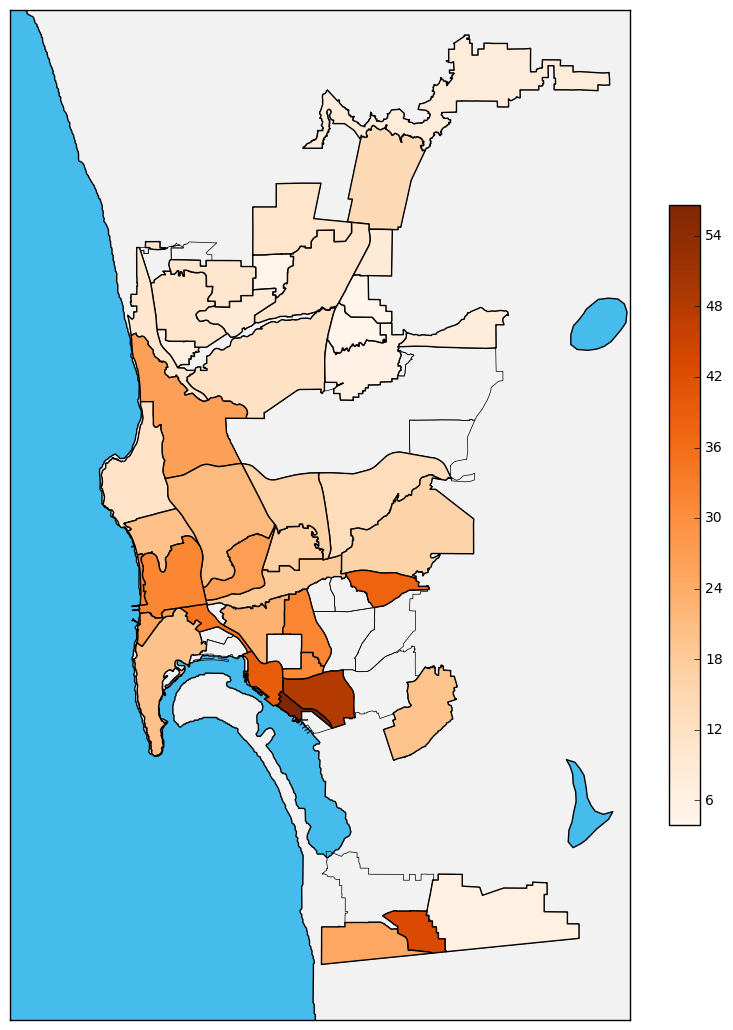

In [72]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

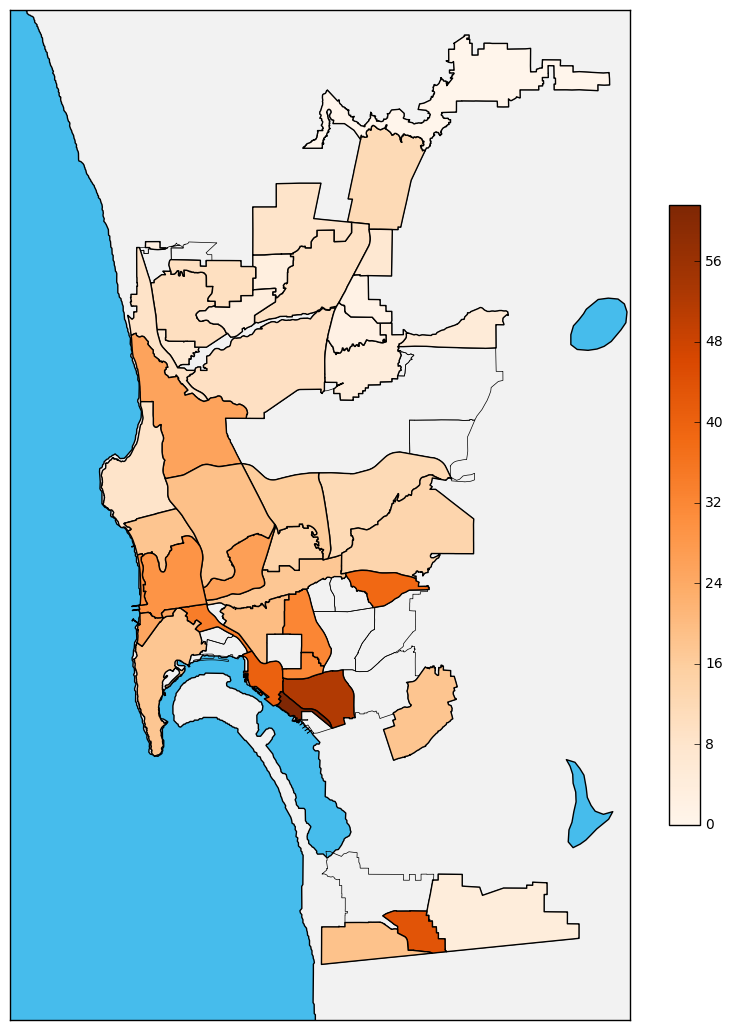

In [73]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

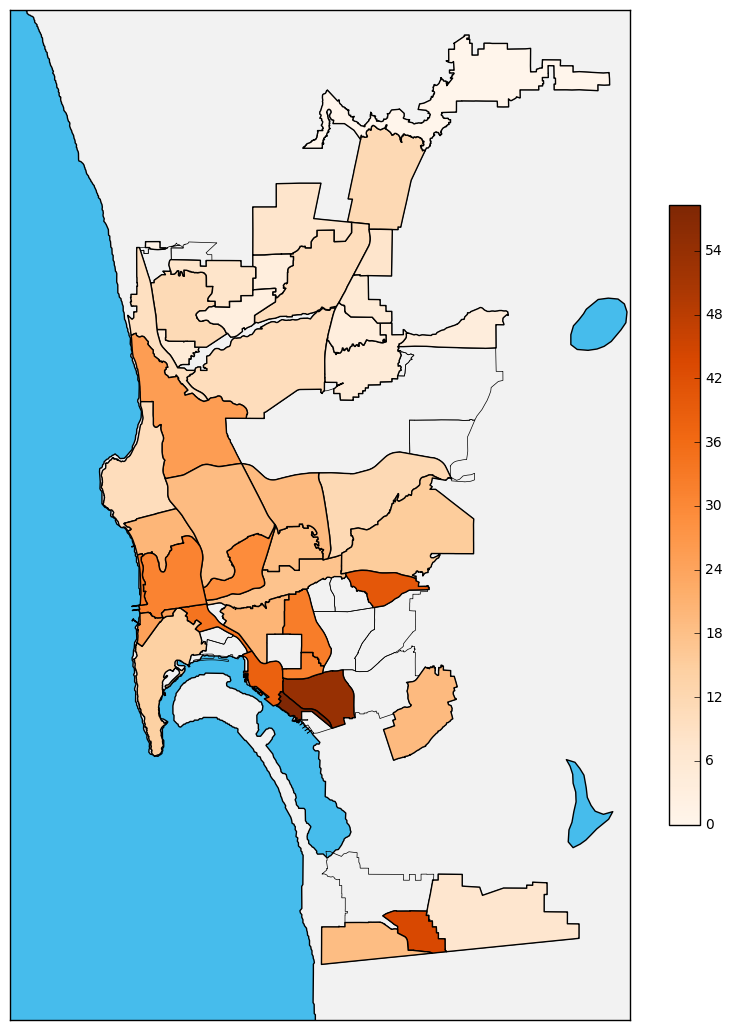

In [74]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

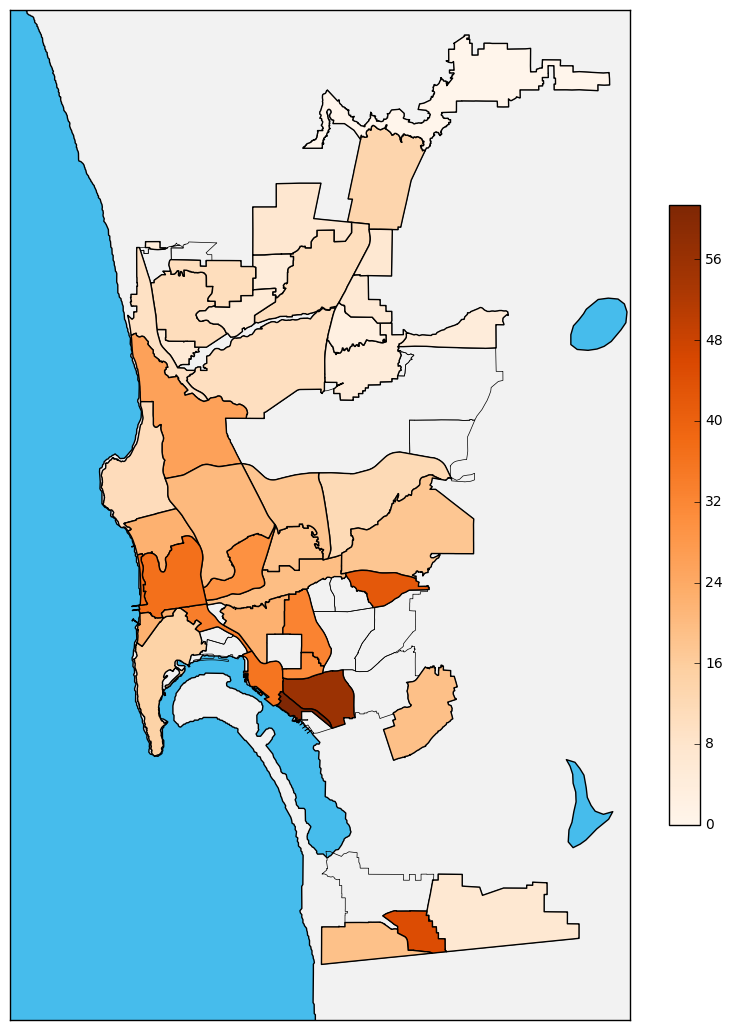

In [75]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

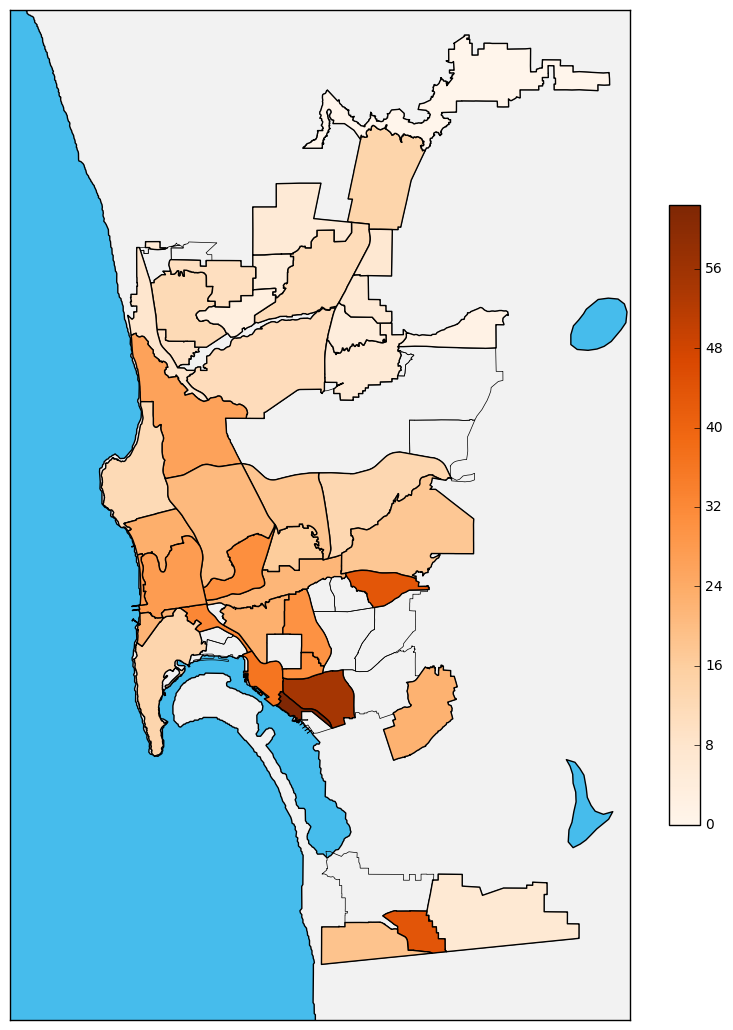

In [76]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

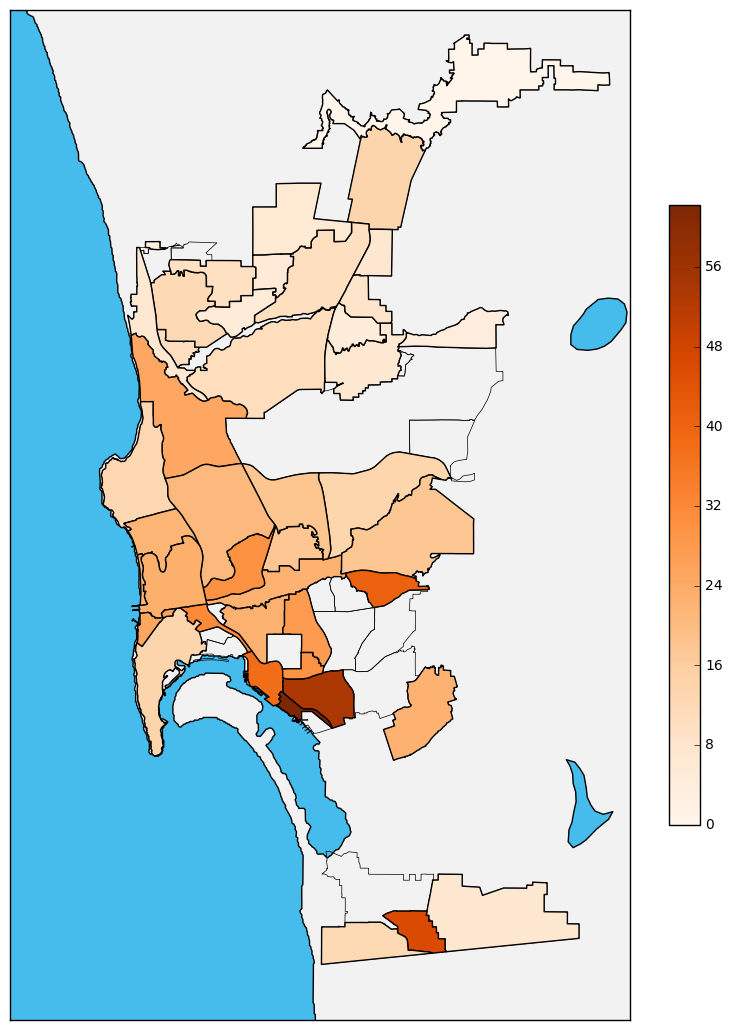

In [77]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

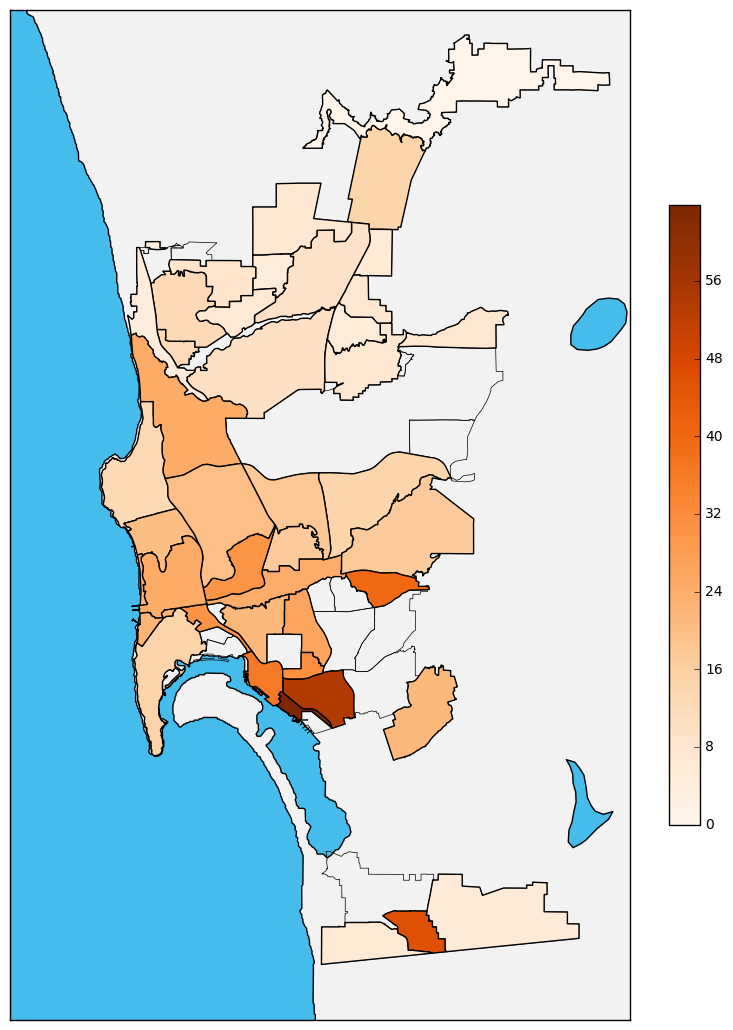

In [78]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m